## **문제**

상근이의 여동생 상냥이는 문방구에서 스티커 2n개를 구매했다. 스티커는 그림 (a)와 같이 2행 n열로 배치되어 있다. 상냥이는 스티커를 이용해 책상을 꾸미려고 한다.

상냥이가 구매한 스티커의 품질은 매우 좋지 않다. 스티커 한 장을 떼면, 그 스티커와 변을 공유하는 스티커는 모두 찢어져서 사용할 수 없게 된다. 즉, 뗀 스티커의 왼쪽, 오른쪽, 위, 아래에 있는 스티커는 사용할 수 없게 된다.

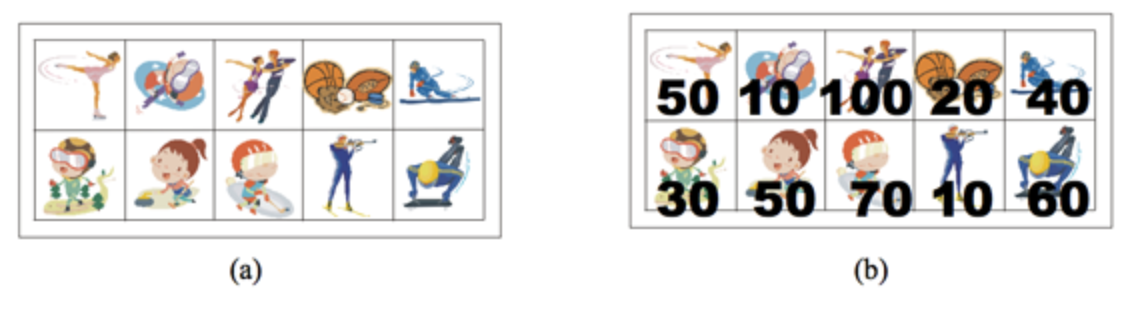

모든 스티커를 붙일 수 없게된 상냥이는 각 스티커에 점수를 매기고, 점수의 합이 최대가 되게 스티커를 떼어내려고 한다. 먼저, 그림 (b)와 같이 각 스티커에 점수를 매겼다. 상냥이가 뗄 수 있는 스티커의 점수의 최댓값을 구하는 프로그램을 작성하시오. 즉, 2n개의 스티커 중에서 점수의 합이 최대가 되면서 서로 변을 공유 하지 않는 스티커 집합을 구해야 한다.

위의 그림의 경우에 점수가 50, 50, 100, 60인 스티커를 고르면, 점수는 260이 되고 이 것이 최대 점수이다. 가장 높은 점수를 가지는 두 스티커 (100과 70)은 변을 공유하기 때문에, 동시에 뗄 수 없다.

## **입력**

첫째 줄에 테스트 케이스의 개수 T가 주어진다. 각 테스트 케이스의 첫째 줄에는 n (1 ≤ n ≤ 100,000)이 주어진다. 다음 두 줄에는 n개의 정수가 주어지며, 각 정수는 그 위치에 해당하는 스티커의 점수이다. 연속하는 두 정수 사이에는 빈 칸이 하나 있다. 점수는 0보다 크거나 같고, 100보다 작거나 같은 정수이다.

## **출력**

각 테스트 케이스 마다, 2n개의 스티커 중에서 두 변을 공유하지 않는 스티커 점수의 최댓값을 출력한다.

**뭔가 비슷하게 풀면 풀릴거 같은데 안풀림ㅠ**

In [ ]:
import sys

input = sys.stdin.readline
sys.setrecursionlimit(10**6)

n = int(input())

for _ in range(n):
	a = int(input())
	arr = [list(map(int, input().split())) for _ in range(2)]
	high = arr[0][1] + arr[1][0]
	low = arr[0][0] + arr[1][1]

	for i in range(2, a):
		high = max(arr[1][i-1], arr[1][i-2]) + arr[0][i]
		low = max(arr[0][i-1], arr[0][i-2]) + arr[1][0]
	print(max(high, low))

**엥 얘도 틀림**

In [ ]:
import sys

input = sys.stdin.readline
sys.setrecursionlimit(10**6)

n = int(input())

for _ in range(n):
	a = int(input())
	arr = [list(map(int, input().split())) for _ in range(2)]
	dp = [[0]*a for _ in range(2)]

	dp[0][0] = arr[0][0]
	dp[1][0] = arr[1][0]

	for i in range(1, a):
		dp[0][i] = max(dp[1][i-1], dp[1][i-2]) + arr[0][i]
		dp[1][i] = max(dp[0][i-1], dp[0][i-2]) + arr[1][i]
	print(max(dp[0][a - 1], dp[1][a - 1]))

**또 틀림...ㅅㅂ**

In [ ]:
import sys

input = sys.stdin.readline
sys.setrecursionlimit(10**6)

n = int(input())

for _ in range(n):
	a = int(input())
	arr = [list(map(int, input().split())) for _ in range(2)]

	arr[0][1] += arr[1][0]
	arr[1][1] += arr[0][0]

	for i in range(2, a):
		arr[0][i] += max(arr[1][i-1], arr[1][i-2])
		arr[1][i] += max(arr[0][i-1], arr[0][i-2])
	print(max(arr[0][a - 1], arr[1][a - 1]))

**드디어 정답!!!!!!!!**

In [ ]:
import sys

input = sys.stdin.readline

n = int(input())

for _ in range(n):
	a = int(input())
	arr = [list(map(int, input().split())) for _ in range(2)]
	if len(arr[0]) == 1:
		print(max(arr[0][0], arr[1][0]))
		continue

	arr[0][1] += arr[1][0]
	arr[1][1] += arr[0][0]

	for i in range(2, a):
		arr[0][i] += max(arr[1][i-1], arr[1][i-2])
		arr[1][i] += max(arr[0][i-1], arr[0][i-2])
	print(max(arr[0][a - 1], arr[1][a - 1]))